# Análise de Carteira de investimento utilizando Python
_(Fonte:https://www.linkedin.com/pulse/an%25C3%25A1lise-de-carteira-investimento-utilizando-python-felipe-sembay/)_

Empresas de utilidade pública: *SABESP*, *ELETROBRÁS*, *ENERGISA*. O período é desde o dia 06/01/2010. Vamos simular um aporte de $ R\$3.000,00 $ por empresa.

In [ ]:
#instalar bibliotecas
%pip install yfinance
!pip install git+https://github.com/quantopian/pyfolio
%pip install pulp
%pip install pandas datareader

  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-2mzxu8e6
  Running command git clone --filter=blob:none --quiet https://github.com/quantopian/pyfolio /tmp/pip-req-build-2mzxu8e6
  Resolved https://github.com/quantopian/pyfolio to commit 4b901f6d73aa02ceb6d04b7d83502e5c6f2e81aa
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.3 MB/s eta 0:00:00
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-py3-none-any.whl size=75761 sha256=37875fca9877e8b58956dd2717a4a5940b08faaad66cc9f9ab1e698f65149f86
  Stored in directory: /tmp/pip-ephem-wheel-cache-rfg5k97i/wheels/25/2f/dd/558b6be9405213c9f6fdb1c5a062028a4da70862268f4116e6
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39762 sha256=9386f64a08b977d631318dd9f5e77d199ae54cd5ebbcf8191a56d8d1c66c676d
  Stored in d

In [ ]:
#importar bibliotecas
import numpy as np
import seaborn
import pandas as pd
import yfinance as yf
import pyfolio as pf
from datetime import datetime
import pulp as p
import pandas_datareader as web

/usr/local/lib/python3.10/dist-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [ ]:
#end_data = datetime.now().strftime('%Y-%m-%d')
tickers = {'SBSP3.SA', 'ENGI3.SA', 'ELET3.SA','^BVSP'}
up = yf.download(tickers, start="2010-01-06", end="2021-03-02", progress=False)['Adj Close']
up

,ELET3.SA,ENGI3.SA,SBSP3.SA,^BVSP
Date,,,,
2010-01-06,16.931116,1.252495,7.690552,70729.0
2010-01-07,17.324648,1.252495,7.568369,70451.0
2010-01-08,17.617510,1.252495,7.695075,70263.0
2010-01-11,17.342951,1.252495,7.751642,70433.0
2010-01-12,17.182793,1.252495,7.602308,70076.0
...,...,...,...,...
2021-02-23,30.984993,16.349064,35.841194,115227.0
2021-02-24,32.056713,16.120085,36.209229,115668.0
2021-02-25,31.791155,15.112580,35.850636,112256.0


Temos $5$ colunas, sendo que, $1$ das colunas refere-se a data, $3$ delas contem os preços das ações no respectivo dia, e a ultima coluna, é a pontuação do índice *Bovespa*.

O indice bovespa é o mais importante indicador do desempenho médio das cotações das ações negociadas na *B3*. As empresas que fazem parte do índice, são as ações com o maior volume negociado nos últimos meses. É o principal indicador e serve como termômetro para os investidores entenderem o desempenho do mercado acionário no país.

Nessa parte do código, transformamos em retornos percentuais ao dia. E após realizarmos a transformação com o *pct_change()*, vamos adicionar o $1$ no primeiro dia, desta forma conseguimos medir a variação percentual das ações por dia em relação ao índice *Bovespa*.

In [ ]:
retorno = up.pct_change()
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1

retorno_acumulado

,ELET3.SA,ENGI3.SA,SBSP3.SA,^BVSP
Date,,,,
2010-01-06,1.000000,1.000000,1.000000,1.000000
2010-01-07,1.023243,1.000000,0.984113,0.996070
2010-01-08,1.040540,1.000000,1.000588,0.993411
2010-01-11,1.024324,1.000000,1.007944,0.995815
2010-01-12,1.014865,1.000000,0.988526,0.990768
...,...,...,...,...
2021-02-23,1.830062,13.053196,4.660419,1.629134
2021-02-24,1.893361,12.870378,4.708274,1.635369
2021-02-25,1.877676,12.065980,4.661647,1.587128


Aqui, temos o retorno acumulado dessa carteira. Enquanto que de Janeiro de 2010 até a data presente o índice *Bovespa* que é o nosso termômetro valorizou cerca de $55,99\%$, enquanto que a valorização mais baixa dessa carteira foi de $76,67\%$ que é a ação da *Eletrobrás*.

Já as ações da *Energisa* valorizaram mais de $1.064\%$ nesse período. E as ações da *Sabesp*, valorizaram cerca de $334,75\%$. Uma prova que o longo prazo funciona. E não estamos considerando os dividendos. Esse é o rendimento bruto no período.

<Axes: xlabel='Date'>

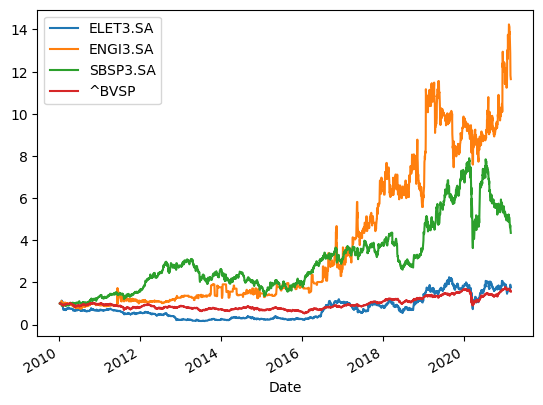

In [ ]:
retorno_acumulado.plot()

In [ ]:
carteira = 3000 * retorno_acumulado.iloc[:, :5]

for i in range(len(carteira)):
  carteira.iloc[i] = carteira.iloc[i] + i*200

carteira['Saldo'] = carteira.sum(axis=1)- carteira['^BVSP']
carteira['Retorno'] = carteira['Saldo'].pct_change()
carteira

,ELET3.SA,ENGI3.SA,SBSP3.SA,^BVSP,Saldo,Retorno
Date,,,,,,
2010-01-06,3000.000000,3000.000000,3000.000000,3000.000000,9.000000e+03,NaN
2010-01-07,3269.729331,3200.000000,3152.337996,3188.208514,9.622067e+03,0.069119
2010-01-08,3521.621115,3400.000000,3401.764481,3380.234416,1.032339e+04,0.072886
2010-01-11,3672.972398,3600.000000,3623.830537,3587.445037,1.089680e+04,0.055545
2010-01-12,3844.594206,3800.000000,3765.576997,3772.302733,1.141017e+04,0.047112
...,...,...,...,...,...,...
2021-02-23,557290.186138,590959.589176,565781.257242,556687.401207,1.714031e+06,0.000498
2021-02-24,557680.082679,590611.134049,566124.823416,556906.106406,1.714416e+06,0.000225
2021-02-25,557833.028797,588397.940170,566184.940219,556961.385005,1.712416e+06,-0.001167


In [ ]:
for i in range(3):
  carteira.iloc[i] = carteira.iloc[i] + i*100

carteira

,ELET3.SA,ENGI3.SA,SBSP3.SA,^BVSP,Saldo,Retorno
Date,,,,,,
2010-01-06,3100.000000,3100.000000,3100.000000,3100.000000,9100.000000,NaN
2010-01-07,3269.729331,3200.000000,3152.337996,3188.208514,9222.067327,200.002452
2010-01-08,3421.621115,3300.000000,3301.764481,3280.234416,9423.385596,300.011230
2010-01-11,3072.972398,3000.000000,3023.830537,2987.445037,9096.802935,-0.002914
2010-01-12,3044.594206,3000.000000,2965.576997,2972.302733,9010.171203,-0.009523
...,...,...,...,...,...,...
2021-02-23,5490.186138,39159.589176,13981.257242,4887.401207,58631.032556,0.004327
2021-02-24,5680.082679,38611.134049,14124.823416,4906.106406,58416.040143,-0.003667
2021-02-25,5633.028797,36197.940170,13984.940219,4761.385005,55815.909186,-0.044511


Conforme nossa simulação investimos cerca de $R\$9.000,00$ em ações desde janeiro de 2010, até a presente data teríamos um valor presente de $R\$54.035,43$, isso sem contar os dividendos do período.

<Axes: xlabel='Date'>

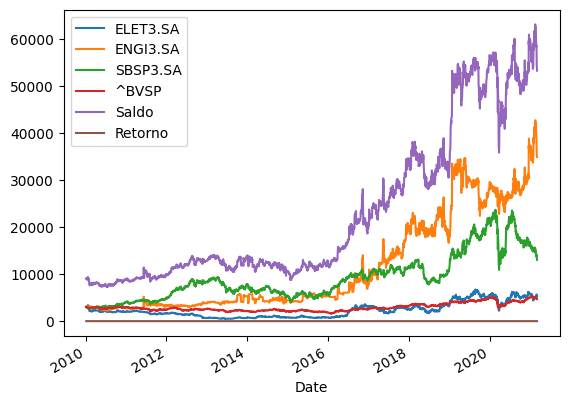

In [ ]:
carteira.plot()

/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2010-01-06
End date,2021-03-01
Total months,131
,Backtest
Annual return,17.6%
Cumulative returns,491.871%
Annual volatility,36.37%
Sharpe ratio,0.63
Calmar ratio,0.46
Stability,0.88
Max drawdown,-37.909%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,37.91,2013-02-28,2015-01-30,2016-03-28,803
1,37.28,2020-01-28,2020-03-23,2020-07-31,134
2,33.67,2016-11-08,2016-12-20,2017-05-10,132
3,26.47,2011-06-10,2011-08-08,2012-02-17,181
4,26.37,2018-02-22,2018-06-21,2018-11-07,185


/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:541: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this w

Stress Events,mean,min,max
US downgrade/European Debt Crisis,-0.06%,-11.59%,6.64%
Fukushima,0.13%,-2.02%,2.11%
EZB IR Event,-0.00%,-5.95%,4.77%
Flash Crash,-0.83%,-0.93%,-0.67%
Apr14,0.36%,-3.20%,5.02%
Oct14,0.04%,-7.31%,6.38%
Fall2015,-0.08%,-7.89%,2.36%
Recovery,0.07%,-19.37%,16.01%
New Normal,0.10%,-15.61%,19.40%


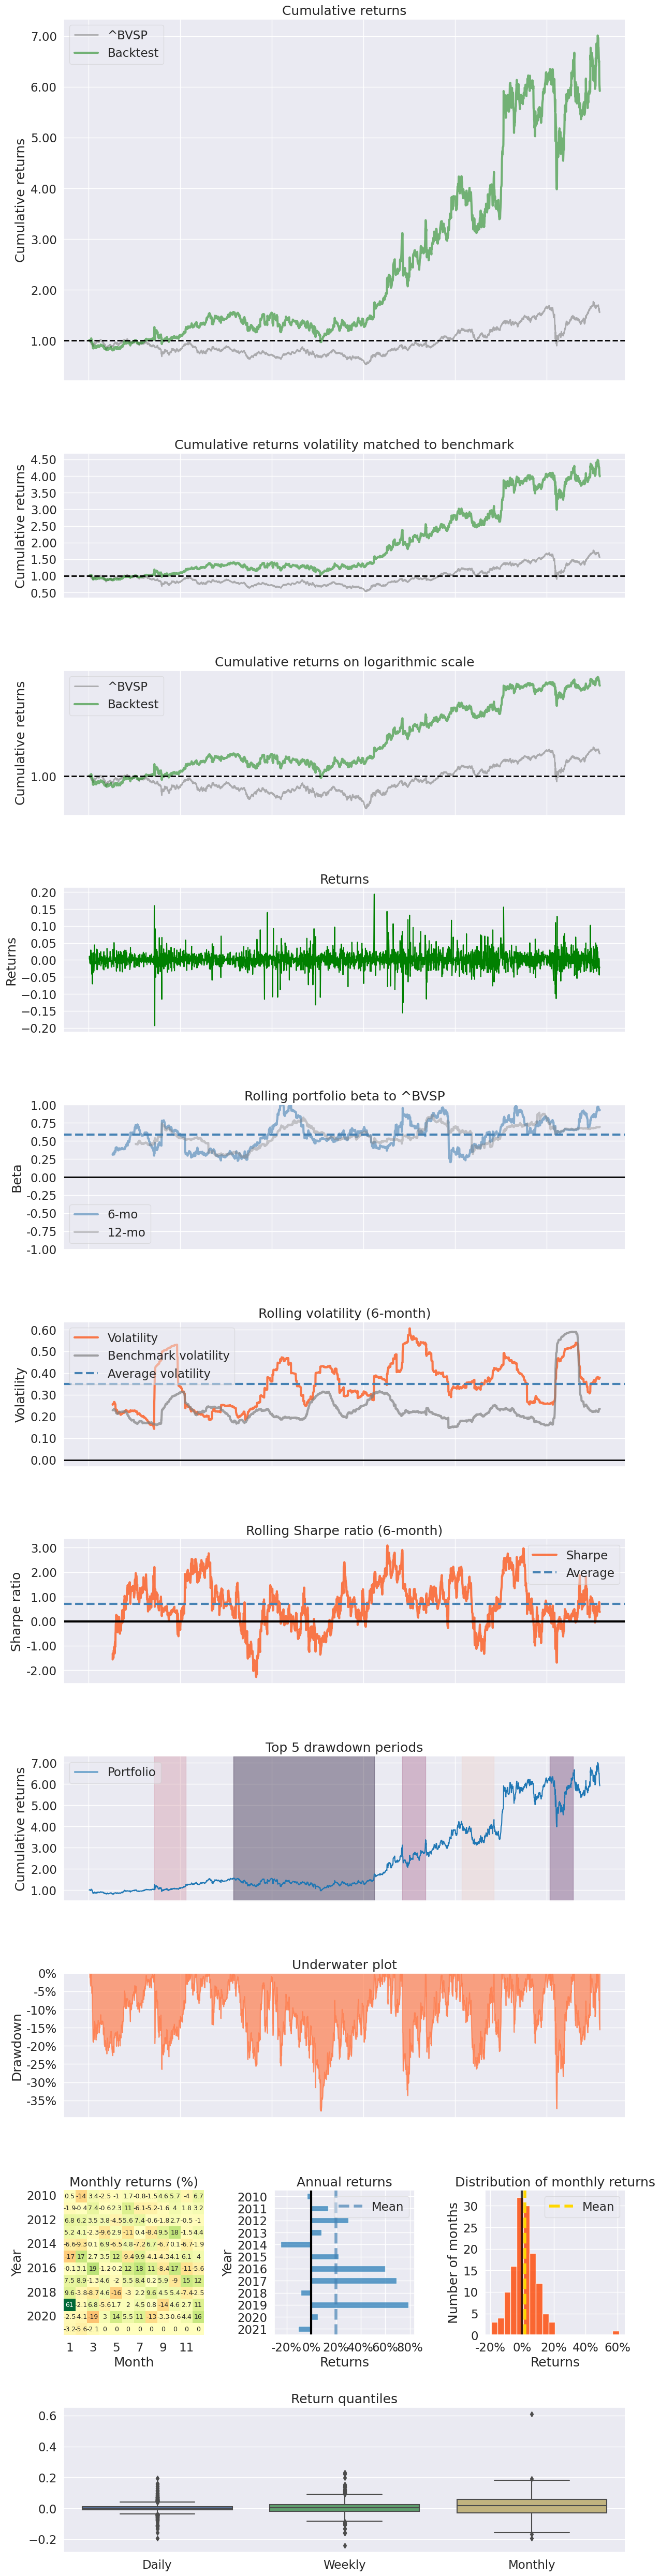

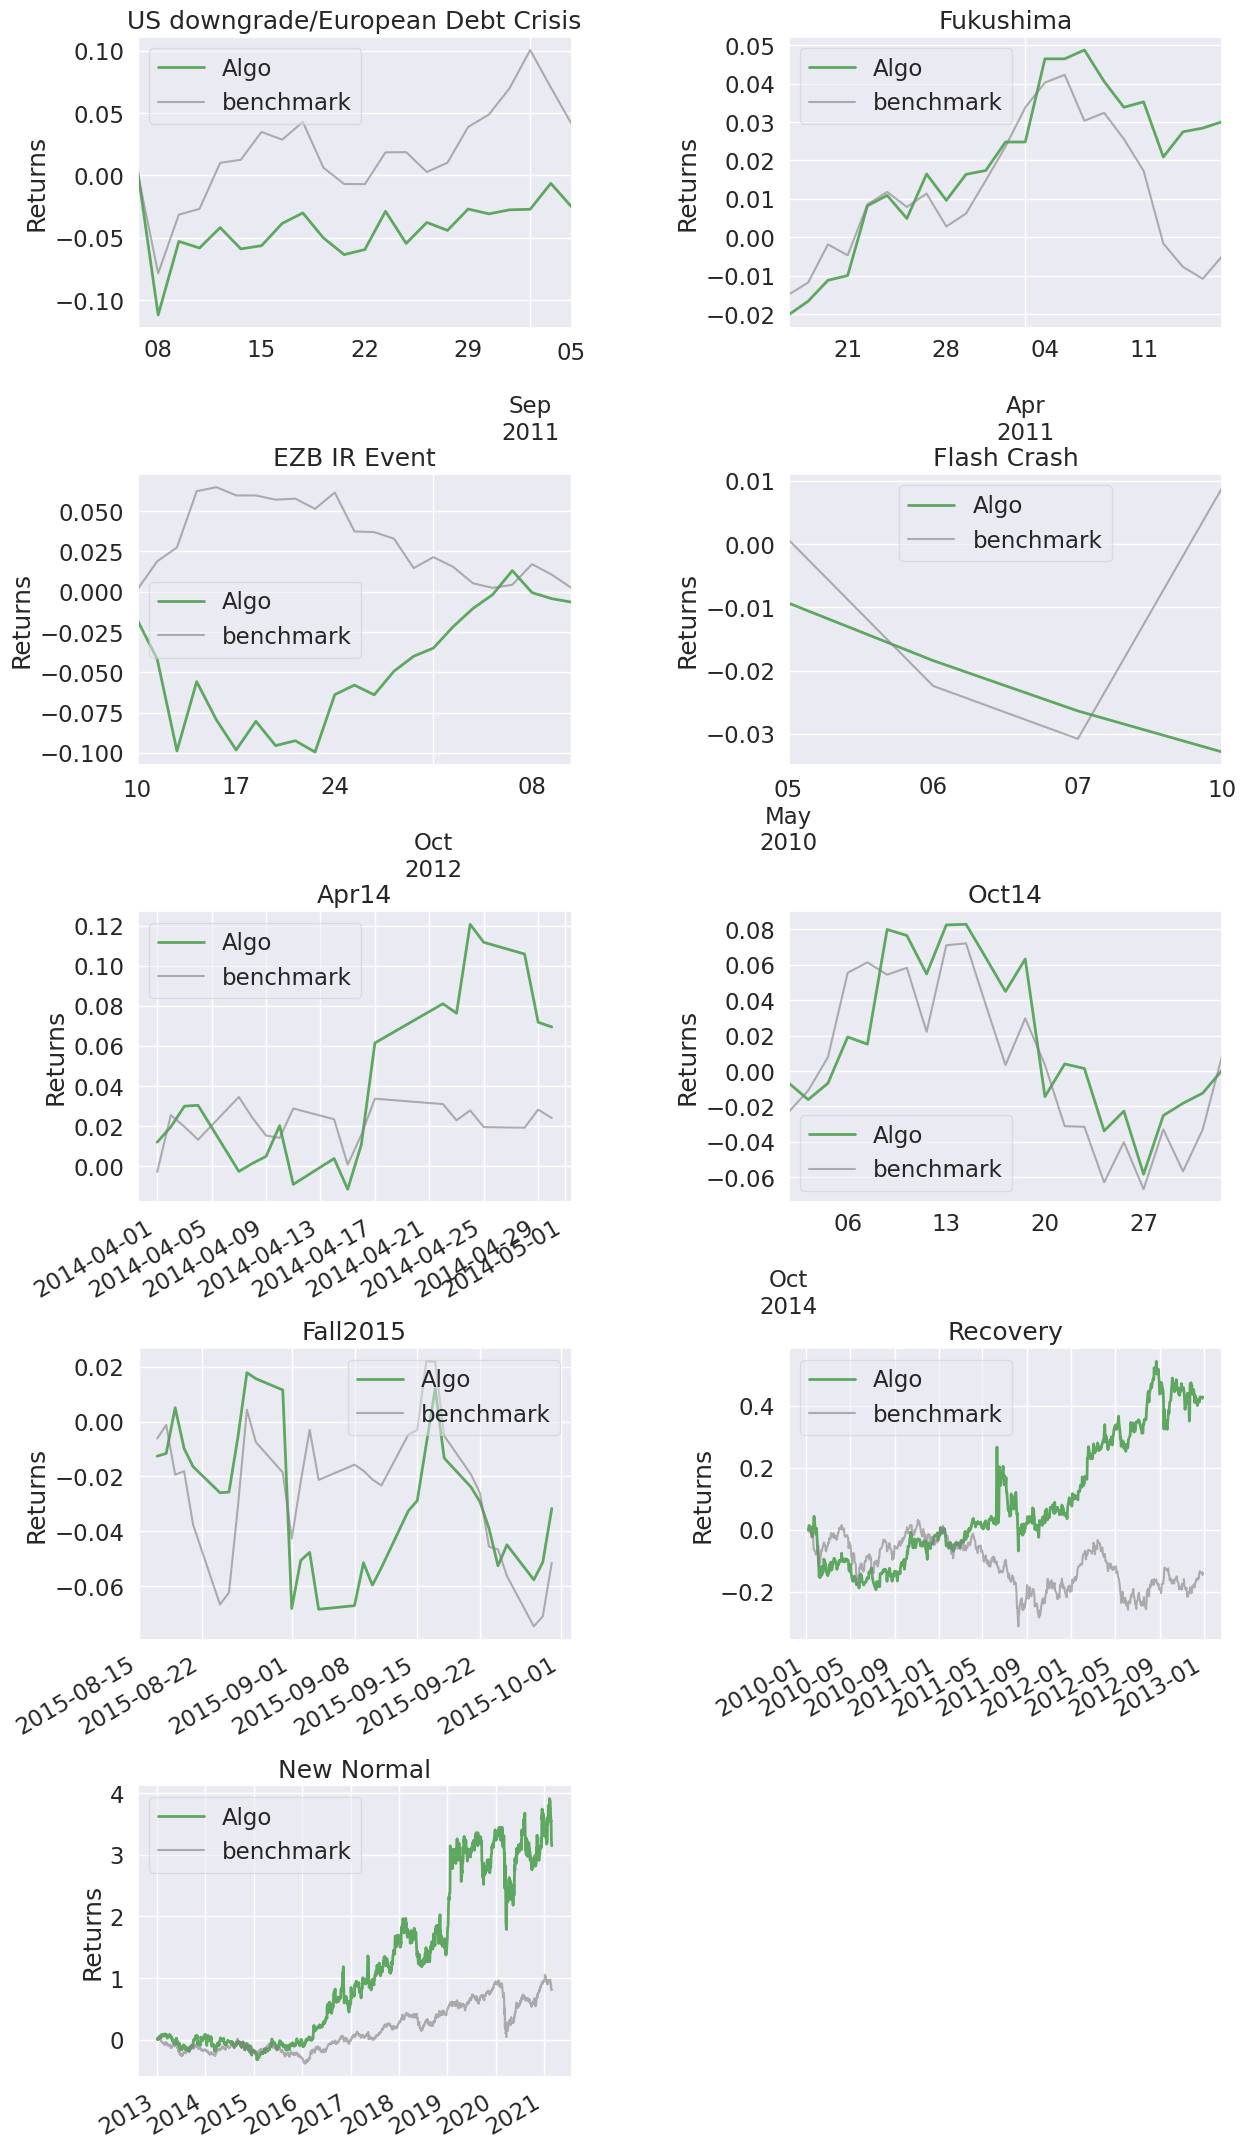

In [ ]:
pf.create_full_tear_sheet(carteira["Retorno"], benchmark_rets=retorno["^BVSP"])

<Axes: xlabel='Date'>

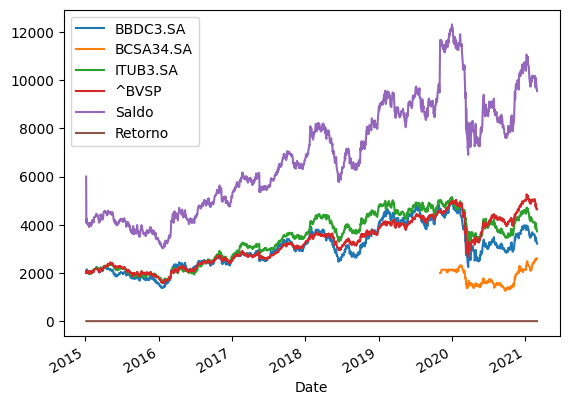

In [ ]:
#carteira 2

#baixar dados das ações
tickers1 = {'ITUB3.SA', 'BBDC3.SA', 'BCSA34.SA','^BVSP'}
up1 = yf.download(tickers1, start="2015-01-05", end="2021-03-02", progress=False)['Adj Close']

#calcular retorno acumulado
retorno1 = up1.pct_change()
retorno_acumulado1 = (1 + retorno1).cumprod()
retorno_acumulado1.iloc[0] = 1

#montar carteira com aporte inicial
carteira1 = 2000 * retorno_acumulado1.iloc[:, :5]
carteira1['Saldo'] = carteira1.sum(axis=1)- carteira1['^BVSP']
carteira1['Retorno'] = carteira1['Saldo'].pct_change()
carteira_retorno1 = carteira1['Retorno']

#calcular retorno anual
carteira_retorno_media1 = carteira_retorno1.mean()
carteira_retorno_anual1 = carteira_retorno_media1 * 252


carteira1.plot()

/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2015-01-05
End date,2021-03-01
Total months,72
,Backtest
Annual return,7.967%
Cumulative returns,59.17%
Annual volatility,34.568%
Sharpe ratio,0.40
Calmar ratio,0.16
Stability,0.84
Max drawdown,-49.647%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,49.65,2015-01-05,2016-01-21,2017-02-21,557
1,43.98,2020-01-02,2020-03-23,NaT,NaN
2,29.84,2018-03-06,2018-06-18,2018-11-28,192
3,15.86,2019-02-04,2019-05-16,2019-07-04,109
4,14.25,2019-07-08,2019-08-26,2019-10-28,81


/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:541: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this w

Stress Events,mean,min,max
Fall2015,-0.14%,-4.55%,5.61%
New Normal,0.05%,-32.12%,21.57%


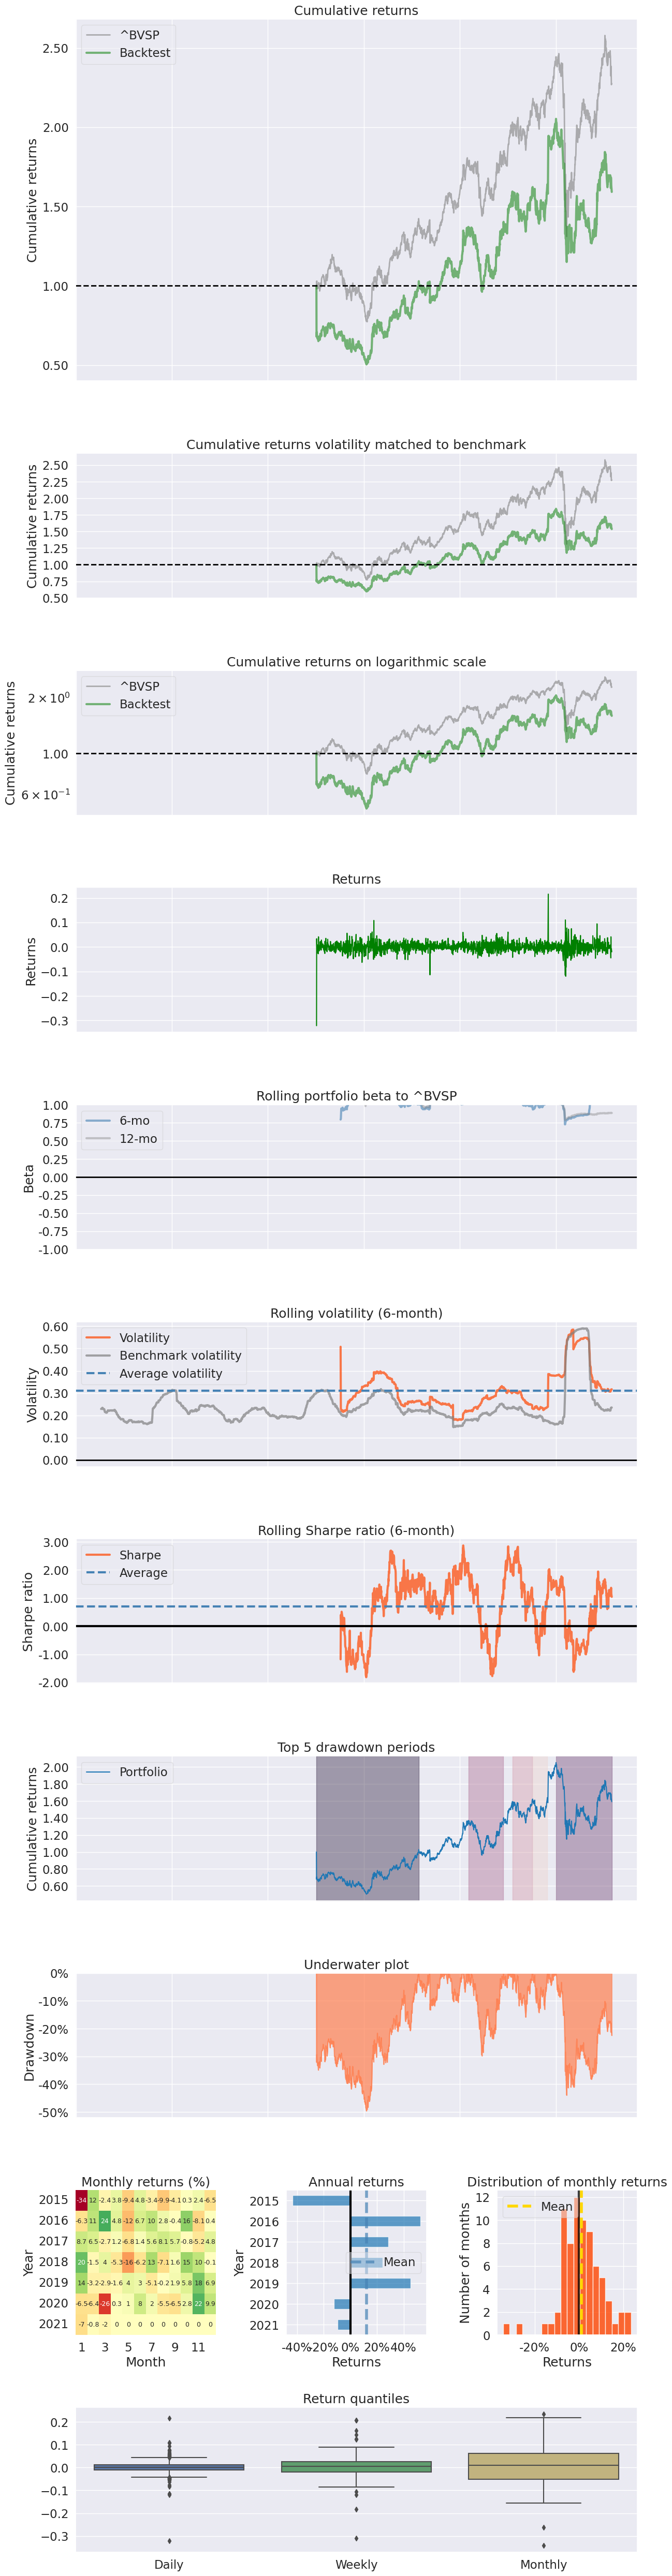

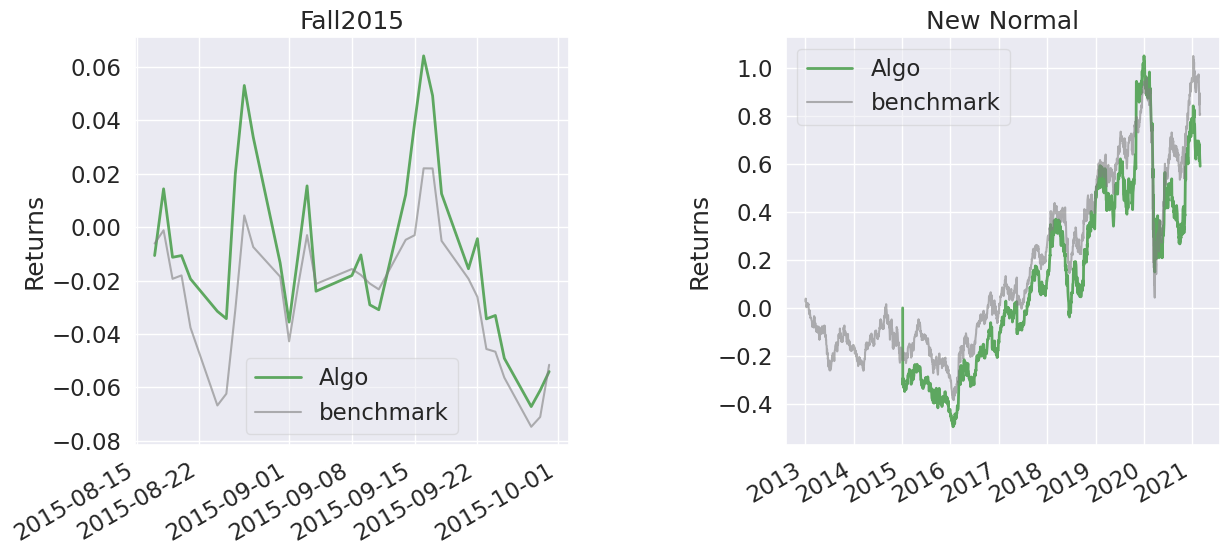

In [ ]:
pf.create_full_tear_sheet(carteira1["Retorno"], benchmark_rets=retorno["^BVSP"])

<Axes: xlabel='Date'>

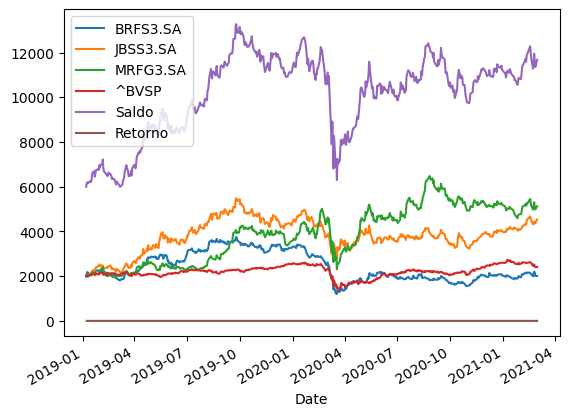

In [ ]:
#carteira 3

#baixar dados das ações
tickers2 = {'BRFS3.SA', 'JBSS3.SA', 'MRFG3.SA','^BVSP'}
up2 = yf.download(tickers2, start="2019-01-05", end="2021-03-02", progress=False)['Adj Close']

#calcular retorno acumulado
retorno2 = up2.pct_change()
retorno_acumulado2 = (1 + retorno2).cumprod()
retorno_acumulado2.iloc[0] = 1

#montar carteira com aporte inicial
carteira2 = 2000 * retorno_acumulado2.iloc[:, :5]
carteira2['Saldo'] = carteira2.sum(axis=1)- carteira2['^BVSP']
carteira2['Retorno'] = carteira2['Saldo'].pct_change()
carteira_retorno2 = carteira2['Retorno']

#calcular retorno anual
carteira_retorno_media2 = carteira_retorno2.mean()
carteira_retorno_anual2 = carteira_retorno_media2 * 252
carteira_retorno_anual2

carteira2.plot()

/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2019-01-07
End date,2021-03-01
Total months,25
,Backtest
Annual return,37.142%
Cumulative returns,94.554%
Annual volatility,47.085%
Sharpe ratio,0.91
Calmar ratio,0.71
Stability,0.36
Max drawdown,-52.542%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,52.54,2019-09-25,2020-03-18,NaT,NaN
1,16.97,2019-02-05,2019-03-07,2019-04-05,44
2,11.98,2019-05-20,2019-06-07,2019-07-05,35
3,6.71,2019-04-25,2019-05-13,2019-05-16,16
4,6.18,2019-07-10,2019-07-17,2019-08-02,18


/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:541: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this w

Stress Events,mean,min,max
New Normal,0.17%,-18.13%,21.42%


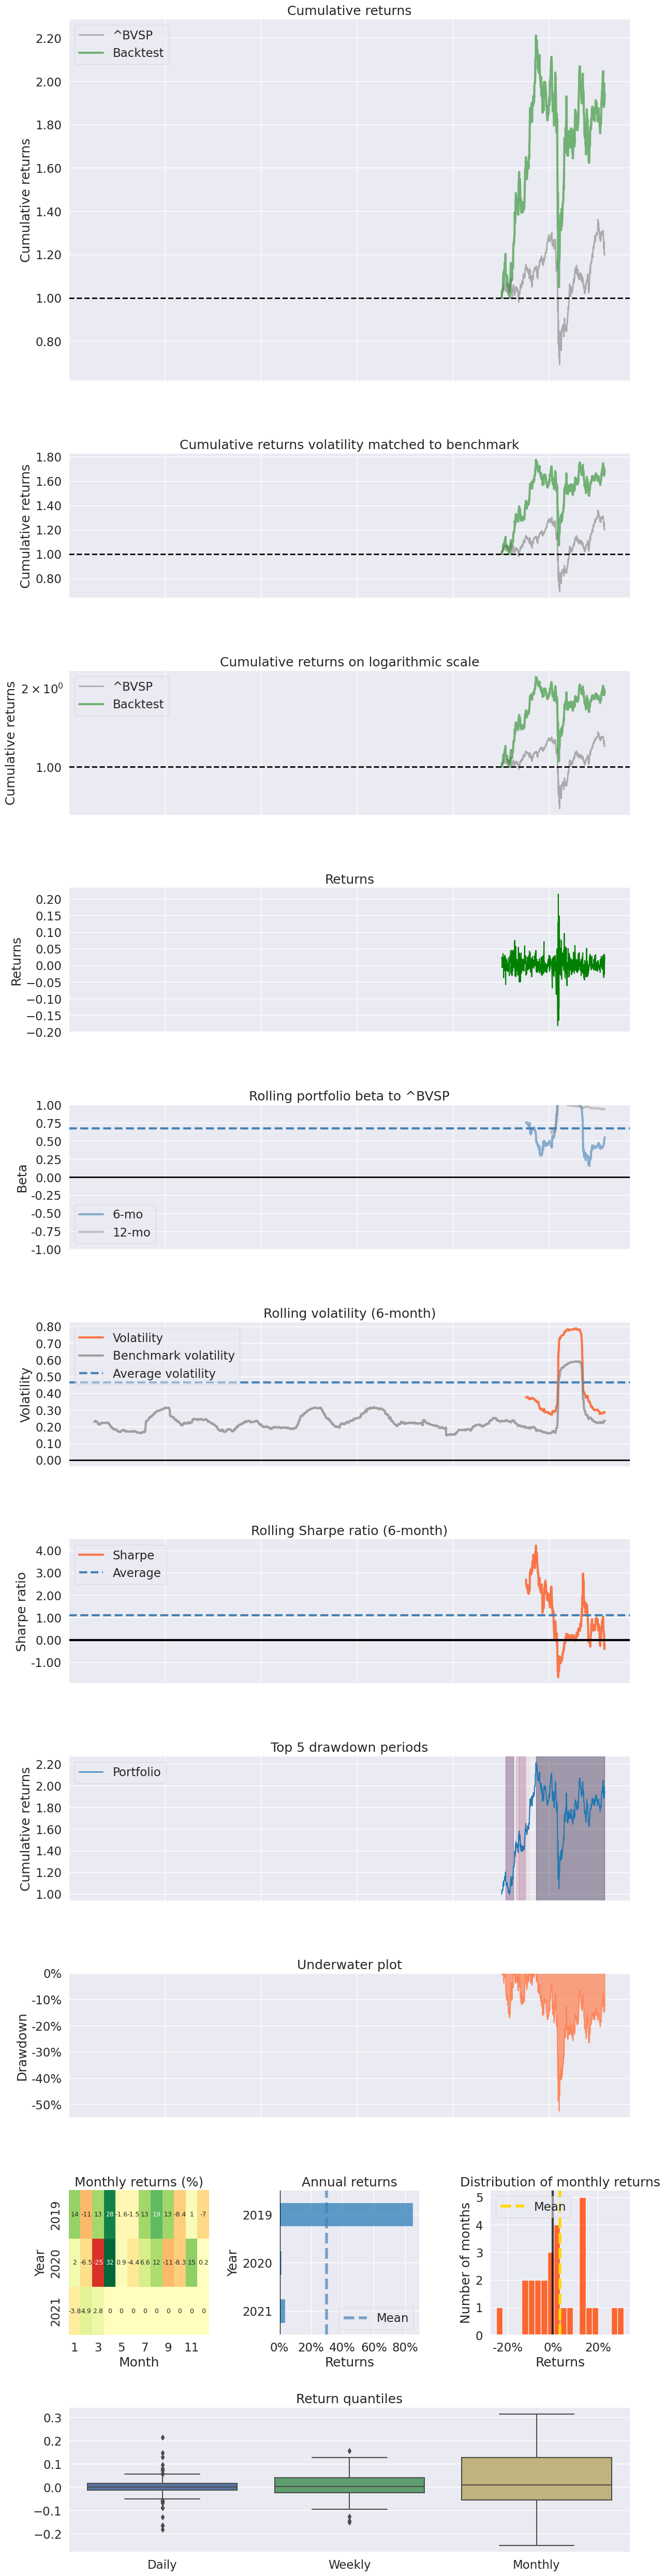

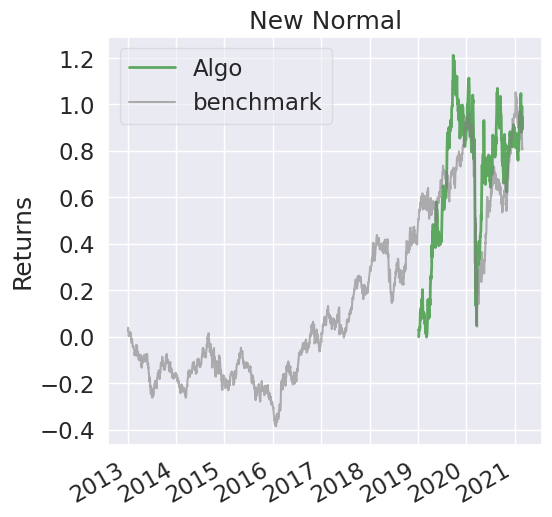

In [ ]:
pf.create_full_tear_sheet(carteira2["Retorno"], benchmark_rets=retorno["^BVSP"])

Retorno anual 1: 0.176
Retorno anual 2:0.079
Retorno anual 3:0.371
 


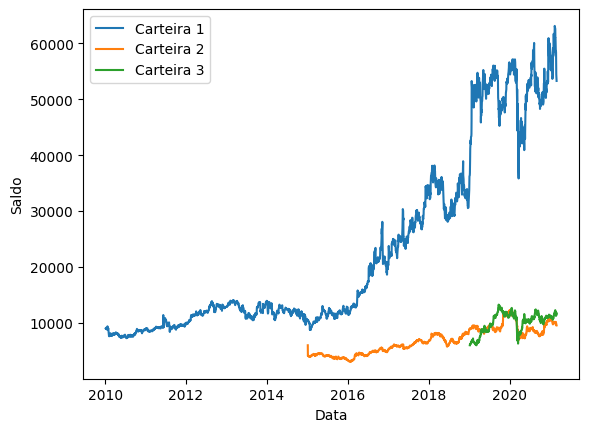

In [ ]:
import matplotlib.pyplot as plt

plt.plot(carteira['Saldo'], label='Carteira 1')
plt.plot(carteira1['Saldo'], label='Carteira 2')
plt.plot(carteira2['Saldo'], label='Carteira 3')

# Adicionar legenda e rótulos aos eixos
plt.legend()
plt.xlabel('Data')
plt.ylabel('Saldo')

print(f"Retorno anual 1:0.176\nRetorno anual 2:0.079\nRetorno anual 3:0.371\n ")

# Exibir o gráfico
plt.show()

## Método Simplex

In [ ]:
prob = p.LpProblem('Rentabilidade', p.LpMaximize)

#Setando as variáveis de decisão
p1 = p.LpVariable('p1', lowBound=0)
p2 = p.LpVariable('p2', lowBound=0)
p3 = p.LpVariable('p3', lowBound=0)


#Setando as taxas de retorno ao ano dos título
i1 = 0.176 #Retorno da carteira 1
i2 = 0.79  #Retorno da carteira 2
i3 = 0.371  #Retorno da carteira 3

In [ ]:
#Criando a função objetivo
prob += i1 * (p1*0.01) + i2 * (p2*0.01) + i3 * (p3*0.01)


#Criando as restrições e parâmetros.
prob += p1 + p2 + p3 ==1
prob += p1 <=0.80
prob += p2 <=0.80
prob += p3 <=0.80
prob += p1 + p3 <=0.5
prob += p1 + p2 >=0.5
prob += p1 >=0
prob += p2 >=0
prob += p3 >=0

In [ ]:
#Resolvendo o Problema
status = prob.solve()
print(p.LpStatus[status])
print(p.value(prob.objective))


#Exibindo a solução final

print(f'Carteira 1:{p.value(p1):.1%}\nCarteira 2:{p.value(p2):.1%}\nCarteira 3:{p.value(p3):.1%}')

Optimal
0.007062000000000001
Carteira 1:0.0%
Carteira 2:80.0%
Carteira 3:20.0%
